In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("binary.csv")

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df.columns=["admit","gre","gpa","prestige"]
df.head()
#df.shape

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
pd.crosstab(df["admit"],df["prestige"],rownames=["admit"])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29d87fb610>,
      dtype=object)

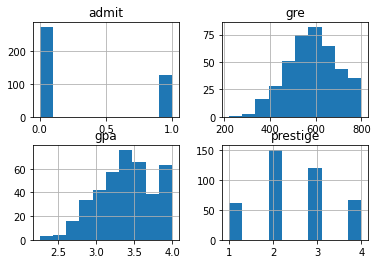

In [7]:
df.hist()

In [9]:
dummy_ranks=pd.get_dummies(df["prestige"],prefix="prestige")


In [10]:
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [12]:
cols_to_keep=["admit","gre","gpa"]
data=df[cols_to_keep].join(dummy_ranks.loc[:"prestige_2":])
data.head()

,admit,gre,gpa,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [13]:
data["intercept"]=1.0
data.head()

,admit,gre,gpa,prestige_1,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,0,1,0,1.0
1,1,660,3.67,0,0,1,0,1.0
2,1,800,4.00,1,0,0,0,1.0
3,1,640,3.19,0,0,0,1,1.0
4,0,520,2.93,0,0,0,1,1.0


In [14]:
train_cols=data.columns[1:]
logit=sm.Logit(data["admit"],data[train_cols])

In [23]:
results=logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 8


In [27]:
ironman = results.predict([800,4,1,0,0,0,1.0])

In [28]:
print(ironman)

[0.73840825]


In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                 0.08292
Time:                        13:01:07   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_1    -0.0846        nan        nan        nan         nan         nan
prestige_2    -0.7600        nan        nan        nan         nan         nan
prestige_3    -1.4248        nan        nan        nan         nan         nan
prestige_4    -1.6360        nan        nan        nan         nan         nan
intercept     -3.9054        nan        nan        nan         nan         nan
==============================================================================
"""